# In this notebook, we visualise followers of selected twitter accounts in a network graph

Specifically, we can visualise how the network of Elon Musk, Vitalik Buterin (Creator of ethereum), like Bloomberg and Goldman Sachs are like on twitter. The hypothesis is that the cryptocurrency community on twitter follows the similar accounts, and these influencial accounts are of high centrality and influence.

Twitter data was extracted in a seperate file using API calls

In [2]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Function to change directory. Please adjust your 'base' accordingly. 

def change_dir (target):
    base = '\\Users\\User\\Documents\\GitHub\\mitb-social-analytics'
    if target == 'base':
        os.chdir(base)
    elif target == 'Follower_id':
        os.chdir(base + '\\data\\' + target)
    elif target == 'data':
        os.chdir(base + '\\' + target)

In [4]:
# changing working directory

print("current working directory", os.getcwd())
#change_dir('Follower_id')
print("current working directory", os.getcwd())

current working directory C:\Users\User\OneDrive\MITB\Social
current working directory C:\Users\User\OneDrive\MITB\Social


### Source and targets of are follower IDs on twitter

In [10]:
ALLdf = pd.read_csv("ALL Level 0-1-2 Follower IDs.csv")
ALLdf

,Source,Target
0,44196397,1527579033361432578
1,44196397,1527578854566633472
2,44196397,1527578523556192256
3,44196397,1527578778968408066
4,44196397,1527578594083749888
...,...,...
179995,713638218952941568,1530215192
179996,713638218952941568,374876495
179997,713638218952941568,1657124220
179998,713638218952941568,1247468976


## In order to simplify the graph for a more readable network, we reduce nodes that have less than 2 degrees (i.e following less than 2 people)

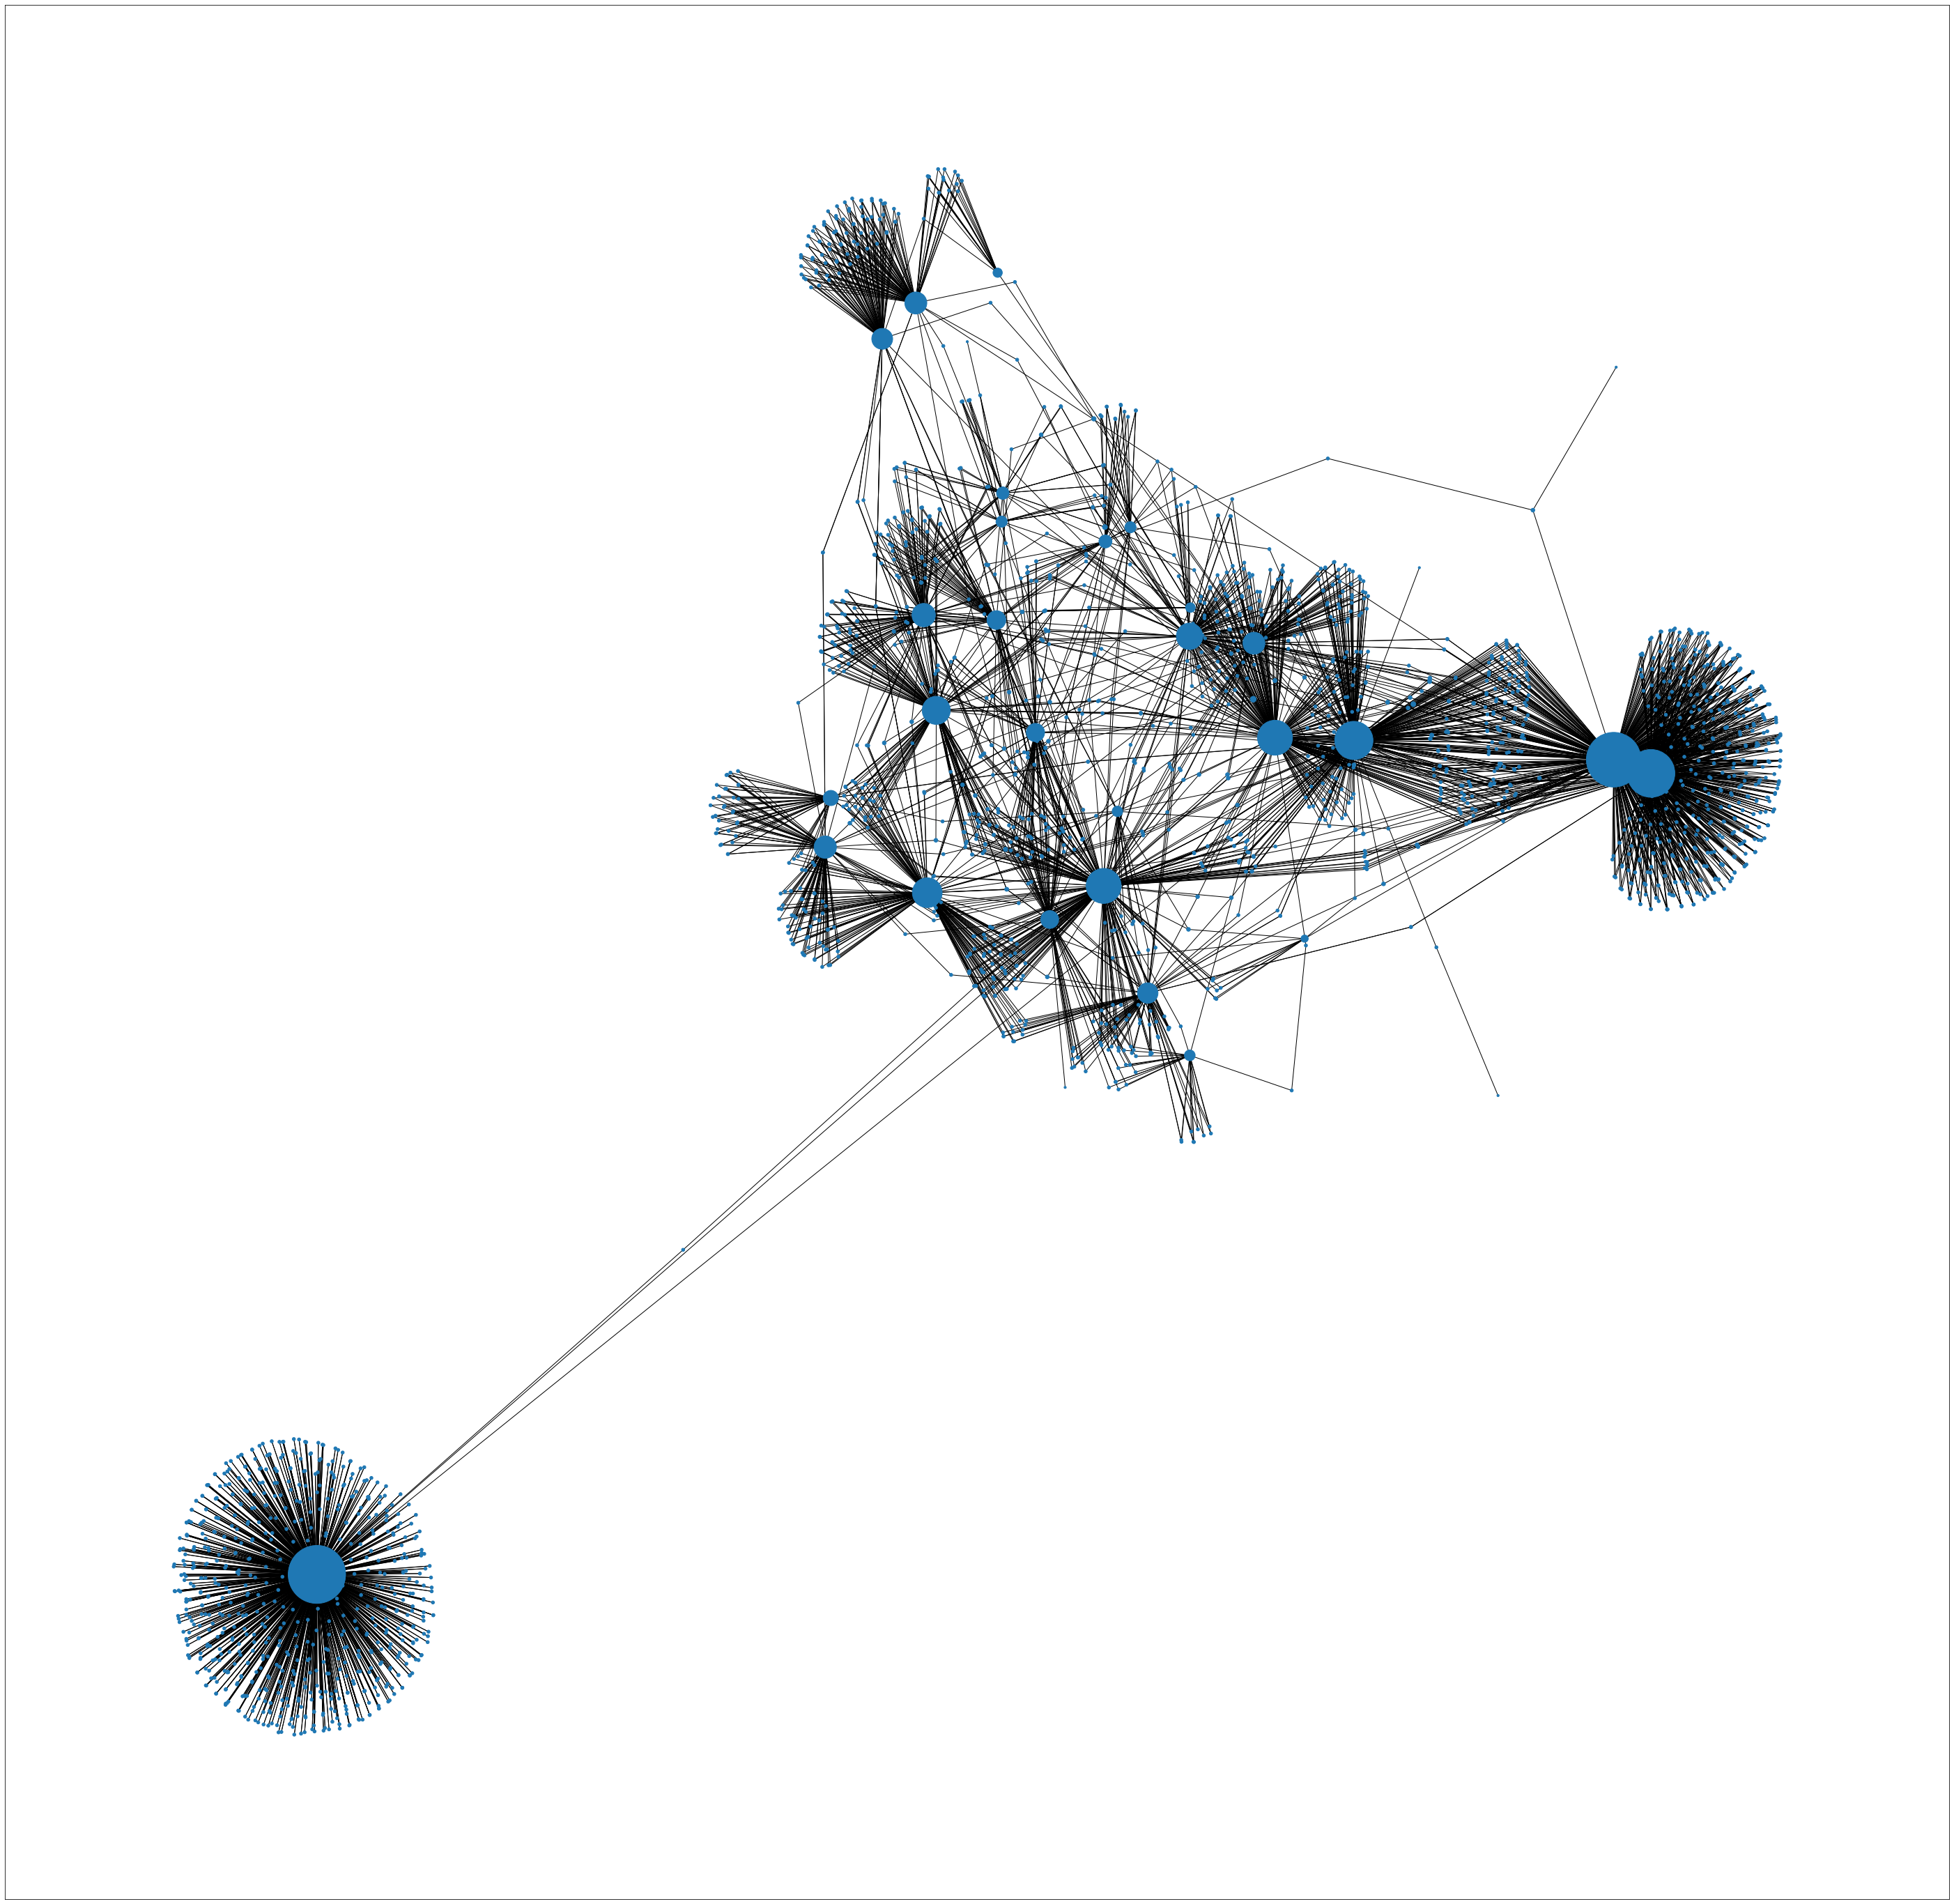

In [63]:
G = nx.from_pandas_edgelist(ALLdf, source='Source', target='Target')

G.remove_nodes_from([
    n
    for n in G.nodes
    if n not in ALLdf['Source']
    if G.degree(n) < 2
])

d = dict(G.degree)

f = plt.figure(figsize=(50,50))
# nx.draw_networkx(G, nodelist = d.keys(), node_size = [v*10 for v in d.values()], with_labels=False)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, nodelist = d.keys(), node_size = [v*10 for v in d.values()], with_labels=False)
plt.show()

As seen from the graph, the large blue nodes are depicted by twitter accounts that have high amount of followers. They are the prominent figures on twitter (Elon Musk, Vitalik Buterin etc). We can see that several of the nodes have higher centrality than others, which indicates that they have more influential power over the cypto community than others.